In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, when, count, mean, min, max

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Rainfall Analysis India") \
    .getOrCreate()


In [5]:
# Load CSV from local path
df = spark.read.csv("file:///C:/Users/yeshw/OneDrive/Desktop/BDA/Sub_Division_IMD_2017.csv", 
                    header=True, inferSchema=True)

# Show first 5 rows
df.show(5)

# Check schema
df.printSchema()


+--------------------+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-----+------+-----+
|         SUBDIVISION|YEAR| JAN|  FEB| MAR|  APR|  MAY|  JUN|  JUL|  AUG|  SEP|  OCT|  NOV|  DEC|ANNUAL|   JF|  MAM|  JJAS|  OND|
+--------------------+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+-----+-----+------+-----+
|Andaman & Nicobar...|1901|49.2| 87.1|29.2|  2.3|528.8|517.5|365.1|481.1|332.6|388.5|558.2| 33.6|3373.2|136.3|560.3|1696.3|980.3|
|Andaman & Nicobar...|1902|   0|159.8|12.2|    0|446.1|537.1|228.9|753.7|666.2|197.2|  359|160.5|3520.7|159.8|458.3|2185.9|716.7|
|Andaman & Nicobar...|1903|12.7|  144|   0|    1|235.1|479.9|728.4|326.7|  339|181.2|284.4|  225|2957.4|156.7|236.1|  1874|690.6|
|Andaman & Nicobar...|1904| 9.4| 14.7|   0|202.4|304.5|495.1|  502|160.1|820.4|222.2|308.7| 40.1|3079.6| 24.1|506.9|1977.6|  571|
|Andaman & Nicobar...|1905| 1.3|    0| 3.3| 26.9|279.5|628.7|368.7|330.5|  297|260.7| 25.4

In [6]:
# Number of rows and columns
print(f"Rows: {df.count()}, Columns: {len(df.columns)}")

Rows: 4188, Columns: 19


In [7]:
df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()


+-----------+----+---+---+---+---+---+---+---+---+---+---+---+---+------+---+---+----+---+
|SUBDIVISION|YEAR|JAN|FEB|MAR|APR|MAY|JUN|JUL|AUG|SEP|OCT|NOV|DEC|ANNUAL| JF|MAM|JJAS|OND|
+-----------+----+---+---+---+---+---+---+---+---+---+---+---+---+------+---+---+----+---+
|          0|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|  0|  0|   0|  0|
+-----------+----+---+---+---+---+---+---+---+---+---+---+---+---+------+---+---+----+---+



In [8]:
# Fill numeric missing values with mean
numeric_cols = [c for c, t in df.dtypes if t in ('int', 'double')]
for c in numeric_cols:
    mean_val = df.select(mean(col(c))).collect()[0][0]
    df = df.na.fill({c: mean_val})

# Fill categorical missing values with 'Unknown'
categorical_cols = [c for c, t in df.dtypes if t == 'string']
for c in categorical_cols:
    df = df.na.fill({c: 'Unknown'})


In [9]:
duplicate_count = df.count() - df.dropDuplicates().count()
print(f"Duplicate rows: {duplicate_count}")


Duplicate rows: 0


In [10]:
# Summary stats
df.describe().show()

# Max and Min rainfall (Annual)
df.agg(max("ANNUAL").alias("Max_Rainfall"), min("ANNUAL").alias("Min_Rainfall")).show()


+-------+--------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|         SUBDIVISION|             YEAR|               JAN|              FEB|               MAR|              APR|               MAY|               JUN|              JUL|               AUG|               SEP|              OCT|              NOV|               DEC|           ANNUAL|                JF|               MAM|              JJAS|               OND|
+-------+--------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+----------------

In [15]:
from pyspark.sql.functions import round, mean, col

# Average Rainfall by Subdivision (rounded to 2 decimals)
df.groupBy("SUBDIVISION") \
  .agg(round(mean("ANNUAL"), 2).alias("Average_Rainfall")) \
  .orderBy(col("Average_Rainfall").desc()) \
  .show(10)


+--------------------+----------------+
|         SUBDIVISION|Average_Rainfall|
+--------------------+----------------+
|   Arunachal Pradesh|         3403.96|
|   Coastal Karnataka|         3397.64|
|        Konkan & Goa|         2987.53|
|Andaman & Nicobar...|         2926.37|
|              Kerala|         2914.25|
|Sub Himalayan Wes...|         2750.55|
|   Assam & Meghalaya|         2579.13|
|Naga Mani Mizo Tr...|         2432.72|
|         Lakshadweep|         1587.29|
|Gangetic West Bengal|         1490.61|
+--------------------+----------------+
only showing top 10 rows



In [16]:
df.groupBy("SUBDIVISION").agg(round(mean("ANNUAL"), 2).alias("Average_Rainfall")) \
    .orderBy(col("Average_Rainfall").desc()).show(10)


+--------------------+----------------+
|         SUBDIVISION|Average_Rainfall|
+--------------------+----------------+
|   Arunachal Pradesh|         3403.96|
|   Coastal Karnataka|         3397.64|
|        Konkan & Goa|         2987.53|
|Andaman & Nicobar...|         2926.37|
|              Kerala|         2914.25|
|Sub Himalayan Wes...|         2750.55|
|   Assam & Meghalaya|         2579.13|
|Naga Mani Mizo Tr...|         2432.72|
|         Lakshadweep|         1587.29|
|Gangetic West Bengal|         1490.61|
+--------------------+----------------+
only showing top 10 rows



In [27]:
spark.stop()

In [30]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------ --------------------------------- 1.0/7.0 MB 5.8 MB/s eta 0:00:02
   ------------ ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


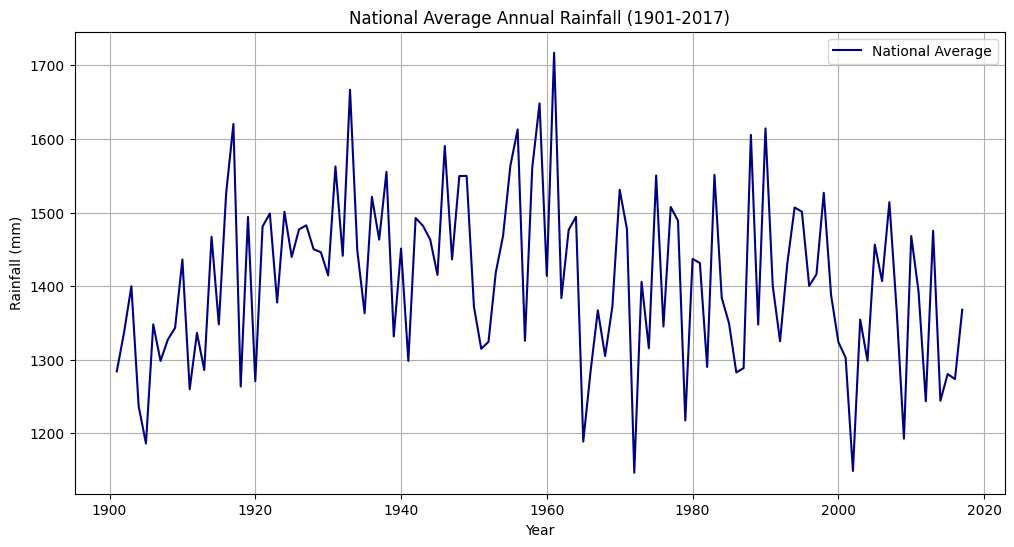

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Sub_Division_IMD_2017.csv')

annual_by_year = df.groupby('YEAR')['ANNUAL'].mean()
plt.figure(figsize=(12,6))
plt.plot(annual_by_year.index, annual_by_year.values, label='National Average', color='navy')
plt.title('National Average Annual Rainfall (1901-2017)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


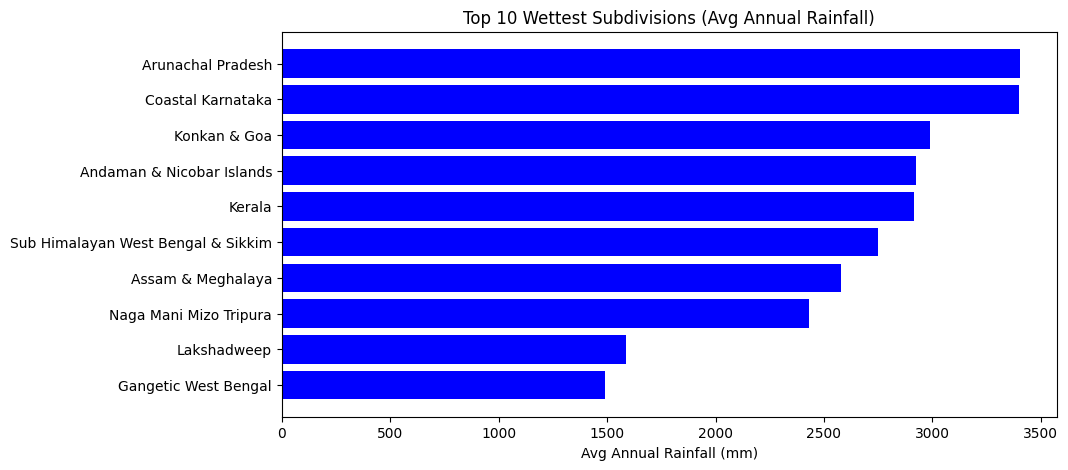

In [33]:
wettest_sub = df.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(wettest_sub.index[::-1], wettest_sub.values[::-1], color='blue')
plt.title('Top 10 Wettest Subdivisions (Avg Annual Rainfall)')
plt.xlabel('Avg Annual Rainfall (mm)')
plt.show()


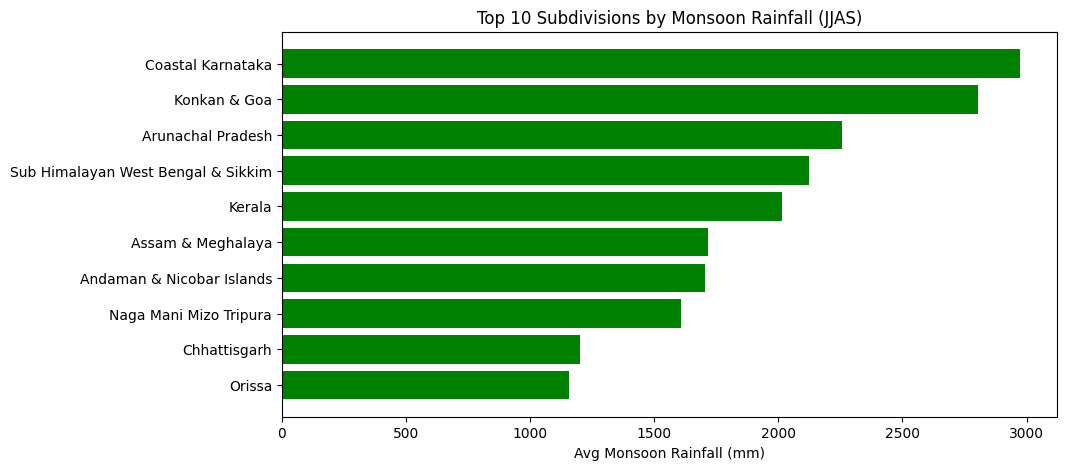

In [34]:
monsoon_avg = df.groupby('SUBDIVISION')['JJAS'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.barh(monsoon_avg.index[::-1], monsoon_avg.values[::-1], color='green')
plt.title('Top 10 Subdivisions by Monsoon Rainfall (JJAS)')
plt.xlabel('Avg Monsoon Rainfall (mm)')
plt.show()


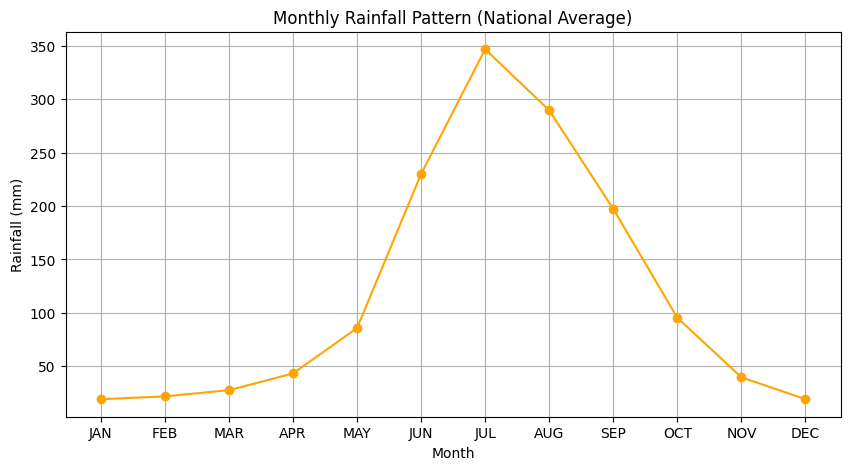

In [35]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avgs = [df[month].mean() for month in months]
plt.figure(figsize=(10,5))
plt.plot(months, monthly_avgs, marker='o', color='orange')
plt.title('Monthly Rainfall Pattern (National Average)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


<Figure size 1400x600 with 0 Axes>

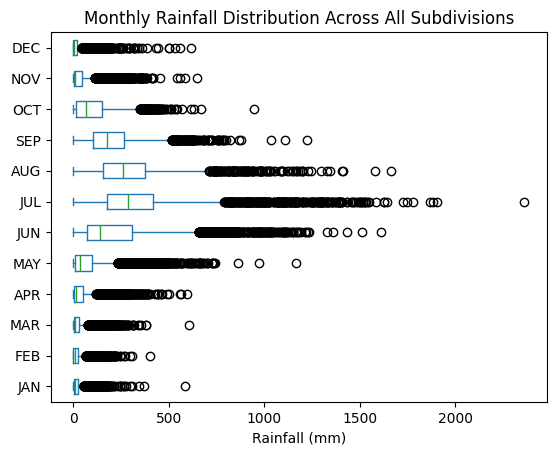

In [36]:
plt.figure(figsize=(14,6))
df_box = df[months]
df_box.plot(kind='box', vert=False)
plt.title('Monthly Rainfall Distribution Across All Subdivisions')
plt.xlabel('Rainfall (mm)')
plt.show()


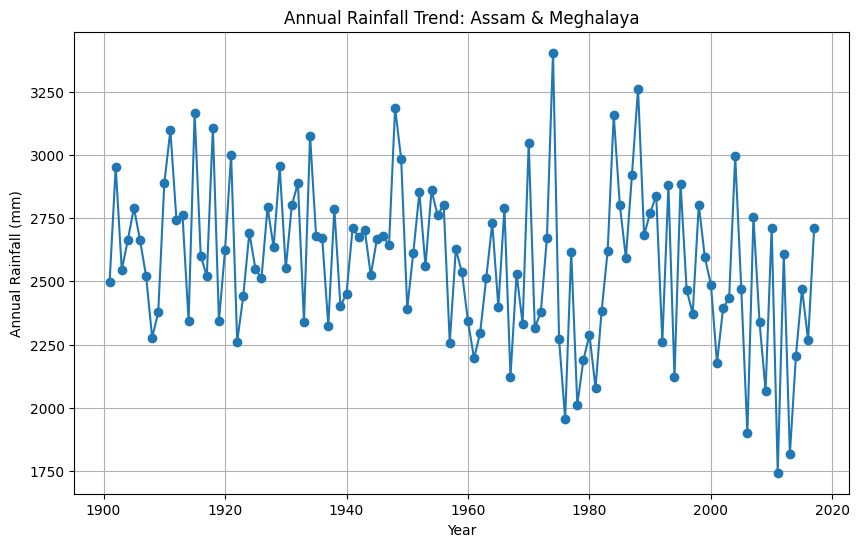

In [37]:
region = 'Assam & Meghalaya'  # Change as needed
df_region = df[df['SUBDIVISION'] == region]
plt.figure(figsize=(10,6))
plt.plot(df_region['YEAR'], df_region['ANNUAL'], marker='o')
plt.title(f'Annual Rainfall Trend: {region}')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True)
plt.show()


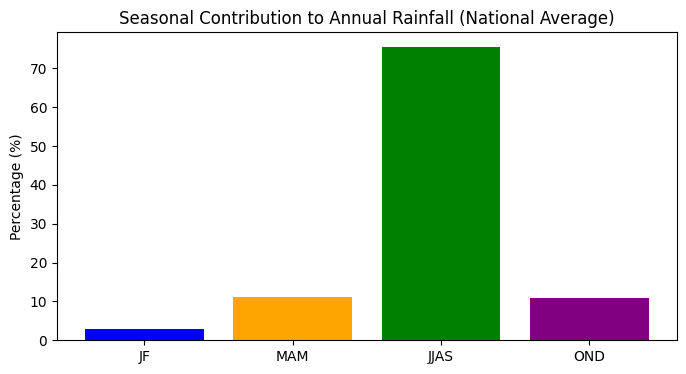

In [38]:
seasons = ['JF', 'MAM', 'JJAS', 'OND']
seasonal_contrib = df[seasons].mean() / df['ANNUAL'].mean() * 100
plt.figure(figsize=(8,4))
plt.bar(seasons, seasonal_contrib, color=['blue','orange','green','purple'])
plt.title('Seasonal Contribution to Annual Rainfall (National Average)')
plt.ylabel('Percentage (%)')
plt.show()


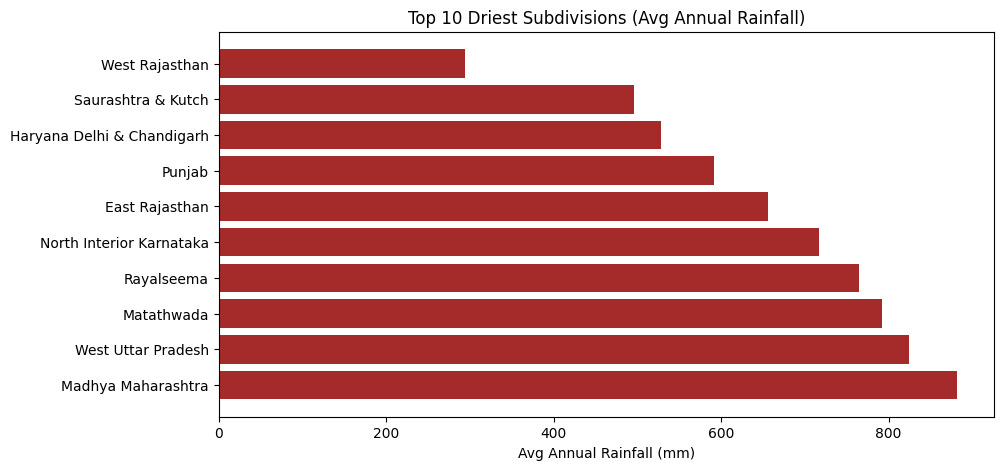

In [39]:
driest_sub = df.groupby('SUBDIVISION')['ANNUAL'].mean().sort_values(ascending=True).head(10)
plt.figure(figsize=(10,5))
plt.barh(driest_sub.index[::-1], driest_sub.values[::-1], color='brown')
plt.title('Top 10 Driest Subdivisions (Avg Annual Rainfall)')
plt.xlabel('Avg Annual Rainfall (mm)')
plt.show()


In [43]:
mean_annual = df['ANNUAL'].mean()
extreme_high = df[df['ANNUAL'] > 1.25 * mean_annual]
extreme_low = df[df['ANNUAL'] < 0.75 * mean_annual]
print("Flood years (national avg):", extreme_high['YEAR'].unique())
print("Drought years (national avg):", extreme_low['YEAR'].unique())


Flood years (national avg): [1901 1902 1903 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1925 1926 1927 1928 1929 1930 1931
 1933 1934 1935 1937 1938 1939 1940 1941 1946 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 1923 1924 1932 1936 1942 1943
 1944 1945 1947 1948 1909]
Drought years (national avg): [1935 1974 1979 1962 1965 1966 1972 1992 2002 2005 2009 2010 1901 1903
 1908 1923 1932 1951 1954 1957 1967 1982 1991 1994 2006 2012 2015 1902
 1905 1906 1907 1912 1913 1914 1918 1919 1920 1926 1927 1928 1929 1931
 1933 1937 1939 1940 1941 1942 1945 1946 1947 1950 1952 1958 1959 1963
 1964 1968 1969 1973 1976 1977 1986 1987 1989 1993 1995 1996 19